In [1]:
import pandas as pd #untuk memproses data, manipulasi data, dan analisis data
import numpy as np #fungsi untuk aljabar linier dan pembuatan bilangan acak
import matplotlib.pyplot as plt #untuk visualisasi data seperti plot, histogram, bar chart, dll
%matplotlib inline
import seaborn as sns #untuk menampilkan visualisasi data lebih menarik
import librosa
import librosa.display
import resampy

from scipy import signal
import tensorflow as tf
import IPython.display as ipd

import pickle
from pickle import load

import pandas as pd

import os

#--Sklearn library-- membantu melakukan processing data ataupun melakukan training data
from sklearn.model_selection import train_test_split #membagi data secara acak
from sklearn.metrics import confusion_matrix, classification_report #untuk memplot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #untuk memplot confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #model performance
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [2]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)

    emphasized_audio = librosa.effects.preemphasis(y=audio, coef=0.97)

    mfccs_features = librosa.feature.mfcc(y=emphasized_audio,
                                          n_fft=2048,
                                          hop_length=512,
                                          sr=44100,
                                          window='hamming',
                                          dct_type=2,
                                          n_mfcc=20)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

def extract_mfcc_from_folders(folder_paths):
    all_mfccs = []
    all_labels = []

    for i, folder_path in enumerate(folder_paths):
        label = i  # Assign a unique label to each class
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if os.path.isfile(file_path) and filename.endswith('.wav'):
                mfccs = features_extractor(file_path)
                all_mfccs.append(mfccs)
                all_labels.append(label)

    return np.array(all_mfccs), np.array(all_labels)

# Define paths to the training and testing folders for each class
training_folder_paths = [
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\training\ajam',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\training\bayati',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\training\hijaz',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\training\nahawand',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\training\rast'
]

testing_folder_paths = [
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\testing\ajam',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\testing\bayati',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\testing\hijaz',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\testing\nahawand',
    r'C:\Users\ushine\Data Mining\Azan Sukses\split_azan_original_dataset\testing\rast'
]

# Extract MFCCs and labels from training data
training_mfccs, training_labels = extract_mfcc_from_folders(training_folder_paths)

# Extract MFCCs and labels from testing data
testing_mfccs, testing_labels = extract_mfcc_from_folders(testing_folder_paths)

# Display the shape of the resulting arrays
print("Training MFCCs shape:", training_mfccs.shape)
print("Training Labels shape:", training_labels.shape)
print("Testing MFCCs shape:", testing_mfccs.shape)
print("Testing Labels shape:", testing_labels.shape)

# Save extracted features and labels using pickle
training_data = {'features': training_mfccs, 'labels': training_labels}
testing_data = {'features': testing_mfccs, 'labels': testing_labels}

with open('./Training_Data.pkl', 'wb') as f:
    pickle.dump(training_data, f)

with open('./Testing_Data.pkl', 'wb') as f:
    pickle.dump(testing_data, f)

# Load extracted features and labels using pickle
with open('./Training_Data.pkl', 'rb') as f:
    training_data = pickle.load(f)

with open('./Testing_Data.pkl', 'rb') as f:
    testing_data = pickle.load(f)

# Create DataFrames for training and testing data
training_df = pd.DataFrame({'feature': training_data['features'].tolist(), 'label': training_data['labels']})
testing_df = pd.DataFrame({'feature': testing_data['features'].tolist(), 'label': testing_data['labels']})

# Rename labels
label_mapping = {0: 'ajam', 1: 'bayati', 2: 'hijaz', 3: 'nahawand', 4: 'rast'}
training_df['label'] = training_df['label'].map(label_mapping)
testing_df['label'] = testing_df['label'].map(label_mapping)

Training MFCCs shape: (200, 20)
Training Labels shape: (200,)
Testing MFCCs shape: (50, 20)
Testing Labels shape: (50,)


In [61]:
# Tampilkan seluruh data dari DataFrame testing_df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\nTraining DataFrame:")
training_df


Training DataFrame:


,feature,label
0,"[-355.3324890136719, 10.84214973449707, -70.06...",ajam
1,"[-370.8905029296875, 23.20957374572754, -146.6...",ajam
2,"[-496.2208251953125, -28.793537139892578, -31....",ajam
3,"[-460.273681640625, -18.98396873474121, -5.502...",ajam
4,"[-528.2042846679688, 9.478331565856934, -24.36...",ajam
5,"[-340.9193115234375, -74.26519775390625, -44.5...",ajam
6,"[-339.01513671875, -27.49043083190918, -35.869...",ajam
7,"[-321.5217590332031, -25.57415008544922, -33.4...",ajam
8,"[-351.2911376953125, -36.08087158203125, -43.8...",ajam
9,"[-284.54364013671875, -64.58732604980469, -44....",ajam


In [4]:
# Tampilkan seluruh data dari DataFrame testing_df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\nTesting DataFrame:")
testing_df


Testing DataFrame:


,feature,label
0,"[-261.309814453125, -52.8917121887207, -51.763...",ajam
1,"[-341.371826171875, -14.449501991271973, -38.6...",ajam
2,"[-328.07708740234375, -33.22261428833008, -64....",ajam
3,"[-313.66558837890625, -52.88821792602539, -51....",ajam
4,"[-264.9950256347656, -17.595029830932617, -60....",ajam
5,"[-332.1094055175781, -43.8901252746582, -55.57...",ajam
6,"[-449.77001953125, -34.71723937988281, -26.544...",ajam
7,"[-286.5934143066406, 10.128998756408691, -83.1...",ajam
8,"[-360.81683349609375, 25.00119972229004, -27.1...",ajam
9,"[-245.28182983398438, -47.73829650878906, -74....",ajam


In [5]:
# Extract features and labels from training DataFrame
X_train = np.array(training_df['feature'].tolist())
y_train = np.array(training_df['label'].tolist())

# Extract features and labels from testing DataFrame
X_test = np.array(testing_df['feature'].tolist())
y_test = np.array(testing_df['label'].tolist())

# Display the shape of the resulting arrays
print("Training Features shape:", X_train.shape)
print("Training Labels shape:", y_train.shape)
print("Testing Features shape:", X_test.shape)
print("Testing Labels shape:", y_test.shape)

Training Features shape: (200, 20)
Training Labels shape: (200,)
Testing Features shape: (50, 20)
Testing Labels shape: (50,)


In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert labels to numerical encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [7]:
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

In [8]:
import numpy as np
import time
import random
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


# Best Hyperparameters from Grid Search
best_hyperparameters = {'dropout_rate1': 0.4, 'dropout_rate2': 0.3, 'dropout_rate3': 0.1, 'dropout_rate4': 0, 
                        'learning_rate': 0.001, 'units_layer1': 2048, 'units_layer2': 1024, 'units_layer3': 256, 
                        'units_layer4': 64, 'units_layer5': 64}


# Inisialisasi K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=random.randint(1, 1000))
fold = 1

losses = []  # Untuk menyimpan hasil loss
train_accuracies = []  # Untuk menyimpan hasil akurasi training
testing_accuracies = []  # Untuk menyimpan hasil akurasi testing
histories = [] # Untuk menyimpan hasil model
training_times = [] # Untuk menyimpan waktu pelatihan setiap fold
all_predictions = []
precicion_scores = []
recall_scores = []
f1_scores = []  # Untuk menyimpan F1 score dari setiap fold
classification_reports = [] #Untuk menyimpan laporan klasifikasi

# Loop melalui setiap lipatan
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Persentase pembagian data training dan testing
    percentage_train = len(train_index) / len(X_train) * 100
    percentage_test = len(test_index) / len(X_train) * 100

    # Inisialisasi model neural network dengan menggunakan parameter terbaik
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer1'], input_shape=(20,), activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate1']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer2'], activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate2']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer3'], activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate3']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer4'], activation="relu"))
    model.add(tf.keras.layers.Dropout(best_hyperparameters['dropout_rate4']))
    model.add(tf.keras.layers.Dense(units=best_hyperparameters['units_layer5'], activation="relu"))
    model.add(tf.keras.layers.Dense(units=5, activation="softmax"))

    # Kompilasi model
    optimizer = tf.keras.optimizers.Adam(best_hyperparameters['learning_rate'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Catat waktu awal
    start_time = time.time()
    
    # Tampilkan Keterangan Fold
    print(f"Fold {fold}")
    
    # Print persentase pembagian data training dan testing
    print(f"Percentage of Data for Training: {percentage_train:.2f}%")
    print(f"Percentage of Data for Testing: {percentage_test:.2f}%")

    # Latih model
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=64)
    histories.append(history)
    model.summary()

    # Catat waktu selesai
    end_time = time.time()

    # Hitung waktu eksekusi
    elapsed_time = end_time - start_time
    training_times.append(elapsed_time)

    # Evaluasi model
    loss, accuracy = model.evaluate(X_train_fold, y_train_fold)
    losses.append(loss)
    train_accuracies.append(accuracy)

    # Prediksi model
    pred = model.predict(X_test_fold)
    pred_ = np.argmax(pred, axis=1)
    pred_ = label_encoder.inverse_transform(pred_)
    true_y = label_encoder.inverse_transform(np.argmax(to_categorical(y_test_fold), axis=1)[:, 1])

    # Menyimpan hasil prediksi dari fold tertentu
    fold_predictions = {'true_labels': true_y, 'predicted_labels': pred_}
    all_predictions.append(fold_predictions)
    
    # Hitung testing akurasi pada fold tertentu
    accuracy_test = accuracy_score(true_y, pred_)
    testing_accuracies.append(accuracy_test)

    # Menghitung Precision, Recall, F1 Score
    precision = precision_score(true_y, pred_, average=None)
    precicion_scores.append(precision)

    recall = recall_score(true_y, pred_, average=None)
    recall_scores.append(recall)

    f1 = f1_score(true_y, pred_, average=None)
    f1_scores.append(f1)

    # Hitung laporan klasifikasi
    report = classification_report(true_y, pred_)
    classification_reports.append(report)

    
    fold += 1


Fold 1
Percentage of Data for Training: 90.00%
Percentage of Data for Testing: 10.00%
Epoch 1/100
3/3 [==============================] - 18s 125ms/step - loss: 14.4912 - accuracy: 0.2000
Epoch 2/100
3/3 [==============================] - 0s 125ms/step - loss: 11.0501 - accuracy: 0.2000
Epoch 3/100
3/3 [==============================] - 0s 110ms/step - loss: 3.9673 - accuracy: 0.2167
Epoch 4/100
3/3 [==============================] - 0s 156ms/step - loss: 3.9608 - accuracy: 0.2667
Epoch 5/100
3/3 [==============================] - 0s 117ms/step - loss: 3.0012 - accuracy: 0.2500
Epoch 6/100
3/3 [==============================] - 0s 117ms/step - loss: 3.0249 - accuracy: 0.2000
Epoch 7/100
3/3 [==============================] - 0s 102ms/step - loss: 2.5726 - accuracy: 0.2167
Epoch 8/100
3/3 [==============================] - 0s 109ms/step - loss: 2.2585 - accuracy: 0.2333
Epoch 9/100
3/3 [==============================] - 0s 125ms/step - loss: 2.1295 - accuracy: 0.2167
Epoch 10/100
3/3 [==

3/3 [==============================] - 0s 109ms/step - loss: 0.9414 - accuracy: 0.5889
Epoch 83/100
3/3 [==============================] - 0s 133ms/step - loss: 0.9220 - accuracy: 0.6333
Epoch 84/100
3/3 [==============================] - 0s 117ms/step - loss: 0.9975 - accuracy: 0.5389
Epoch 85/100
3/3 [==============================] - 0s 102ms/step - loss: 0.9987 - accuracy: 0.5889
Epoch 86/100
3/3 [==============================] - 0s 94ms/step - loss: 0.9010 - accuracy: 0.6167
Epoch 87/100
3/3 [==============================] - 0s 94ms/step - loss: 1.0017 - accuracy: 0.6222
Epoch 88/100
3/3 [==============================] - 0s 94ms/step - loss: 0.9134 - accuracy: 0.6000
Epoch 89/100
3/3 [==============================] - 0s 102ms/step - loss: 0.9087 - accuracy: 0.5889
Epoch 90/100
3/3 [==============================] - 0s 125ms/step - loss: 0.9155 - accuracy: 0.6389
Epoch 91/100
3/3 [==============================] - 0s 117ms/step - loss: 0.7956 - accuracy: 0.6833
Epoch 92/100
3/3

3/3 [==============================] - 0s 117ms/step - loss: 4.4948 - accuracy: 0.2000
Epoch 7/100
3/3 [==============================] - 0s 117ms/step - loss: 3.0164 - accuracy: 0.2944
Epoch 8/100
3/3 [==============================] - 0s 133ms/step - loss: 3.2713 - accuracy: 0.2333
Epoch 9/100
3/3 [==============================] - 0s 133ms/step - loss: 2.8011 - accuracy: 0.2611
Epoch 10/100
3/3 [==============================] - 0s 102ms/step - loss: 2.2677 - accuracy: 0.2944
Epoch 11/100
3/3 [==============================] - 0s 102ms/step - loss: 1.9995 - accuracy: 0.2611
Epoch 12/100
3/3 [==============================] - 0s 125ms/step - loss: 2.0265 - accuracy: 0.3111
Epoch 13/100
3/3 [==============================] - 0s 133ms/step - loss: 1.7163 - accuracy: 0.3000
Epoch 14/100
3/3 [==============================] - 0s 109ms/step - loss: 1.7843 - accuracy: 0.2500
Epoch 15/100
3/3 [==============================] - 0s 133ms/step - loss: 1.5074 - accuracy: 0.3222
Epoch 16/100
3/3

3/3 [==============================] - 0s 117ms/step - loss: 0.6989 - accuracy: 0.7111
Epoch 89/100
3/3 [==============================] - 0s 125ms/step - loss: 0.7160 - accuracy: 0.6944
Epoch 90/100
3/3 [==============================] - 0s 125ms/step - loss: 0.6787 - accuracy: 0.7111
Epoch 91/100
3/3 [==============================] - 0s 117ms/step - loss: 0.6557 - accuracy: 0.7333
Epoch 92/100
3/3 [==============================] - 0s 130ms/step - loss: 0.7362 - accuracy: 0.7000
Epoch 93/100
3/3 [==============================] - 0s 125ms/step - loss: 0.7108 - accuracy: 0.7278
Epoch 94/100
3/3 [==============================] - 0s 117ms/step - loss: 0.6715 - accuracy: 0.6889
Epoch 95/100
3/3 [==============================] - 0s 109ms/step - loss: 0.6285 - accuracy: 0.7500
Epoch 96/100
3/3 [==============================] - 0s 109ms/step - loss: 0.6369 - accuracy: 0.7278
Epoch 97/100
3/3 [==============================] - 0s 133ms/step - loss: 0.6376 - accuracy: 0.7444
Epoch 98/100


3/3 [==============================] - 0s 133ms/step - loss: 2.2612 - accuracy: 0.2389
Epoch 13/100
3/3 [==============================] - 0s 117ms/step - loss: 1.9498 - accuracy: 0.2611
Epoch 14/100
3/3 [==============================] - 0s 133ms/step - loss: 1.6324 - accuracy: 0.3167
Epoch 15/100
3/3 [==============================] - 0s 133ms/step - loss: 1.6841 - accuracy: 0.2833
Epoch 16/100
3/3 [==============================] - 0s 133ms/step - loss: 1.7574 - accuracy: 0.2556
Epoch 17/100
3/3 [==============================] - 0s 141ms/step - loss: 1.5582 - accuracy: 0.3222
Epoch 18/100
3/3 [==============================] - 0s 125ms/step - loss: 1.6003 - accuracy: 0.3611
Epoch 19/100
3/3 [==============================] - 0s 125ms/step - loss: 1.5749 - accuracy: 0.3167
Epoch 20/100
3/3 [==============================] - 0s 125ms/step - loss: 1.5270 - accuracy: 0.3389
Epoch 21/100
3/3 [==============================] - 0s 117ms/step - loss: 1.5276 - accuracy: 0.3556
Epoch 22/100


3/3 [==============================] - 0s 133ms/step - loss: 0.7571 - accuracy: 0.7000
Epoch 95/100
3/3 [==============================] - 0s 117ms/step - loss: 0.7593 - accuracy: 0.6833
Epoch 96/100
3/3 [==============================] - 0s 148ms/step - loss: 0.7814 - accuracy: 0.7111
Epoch 97/100
3/3 [==============================] - 0s 109ms/step - loss: 0.7455 - accuracy: 0.7000
Epoch 98/100
3/3 [==============================] - 0s 133ms/step - loss: 0.7318 - accuracy: 0.7278
Epoch 99/100
3/3 [==============================] - 0s 141ms/step - loss: 0.7387 - accuracy: 0.6889
Epoch 100/100
3/3 [==============================] - 0s 109ms/step - loss: 0.7343 - accuracy: 0.6778
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2048)              43008     
                                                                 
 dropout_16 (Dropout)     

3/3 [==============================] - 0s 109ms/step - loss: 1.1250 - accuracy: 0.5611
Epoch 50/100
3/3 [==============================] - 0s 125ms/step - loss: 1.0916 - accuracy: 0.5444
Epoch 51/100
3/3 [==============================] - 0s 125ms/step - loss: 1.0446 - accuracy: 0.5611
Epoch 52/100
3/3 [==============================] - 0s 141ms/step - loss: 1.0806 - accuracy: 0.5222
Epoch 53/100
3/3 [==============================] - 0s 133ms/step - loss: 1.0003 - accuracy: 0.6000
Epoch 54/100
3/3 [==============================] - 0s 117ms/step - loss: 1.0216 - accuracy: 0.6000
Epoch 55/100
3/3 [==============================] - 0s 117ms/step - loss: 0.9914 - accuracy: 0.5611
Epoch 56/100
3/3 [==============================] - 0s 117ms/step - loss: 1.0128 - accuracy: 0.5667
Epoch 57/100
3/3 [==============================] - 0s 117ms/step - loss: 0.9653 - accuracy: 0.6111
Epoch 58/100
3/3 [==============================] - 0s 109ms/step - loss: 1.0394 - accuracy: 0.5667
Epoch 59/100


3/3 [==============================] - 0s 117ms/step - loss: 1.0229 - accuracy: 0.5611
Epoch 87/100
3/3 [==============================] - 0s 117ms/step - loss: 0.9914 - accuracy: 0.5667
Epoch 88/100
3/3 [==============================] - 1s 213ms/step - loss: 0.9890 - accuracy: 0.5444
Epoch 89/100
3/3 [==============================] - 0s 147ms/step - loss: 0.9512 - accuracy: 0.6222
Epoch 90/100
3/3 [==============================] - 1s 210ms/step - loss: 0.9405 - accuracy: 0.5889
Epoch 91/100
3/3 [==============================] - 0s 152ms/step - loss: 1.0520 - accuracy: 0.5333
Epoch 92/100
3/3 [==============================] - 0s 145ms/step - loss: 0.9421 - accuracy: 0.5722
Epoch 93/100
3/3 [==============================] - 1s 249ms/step - loss: 0.9930 - accuracy: 0.5722
Epoch 94/100
3/3 [==============================] - 0s 152ms/step - loss: 0.8901 - accuracy: 0.6111
Epoch 95/100
3/3 [==============================] - 0s 153ms/step - loss: 0.9689 - accuracy: 0.5944
Epoch 96/100


3/3 [==============================] - 0s 156ms/step - loss: 2.2385 - accuracy: 0.2944
Epoch 11/100
3/3 [==============================] - 1s 188ms/step - loss: 1.9613 - accuracy: 0.2778
Epoch 12/100
3/3 [==============================] - 1s 207ms/step - loss: 1.7275 - accuracy: 0.3111
Epoch 13/100
3/3 [==============================] - 1s 232ms/step - loss: 1.7826 - accuracy: 0.3333
Epoch 14/100
3/3 [==============================] - 1s 232ms/step - loss: 1.9548 - accuracy: 0.2778
Epoch 15/100
3/3 [==============================] - 1s 225ms/step - loss: 1.6589 - accuracy: 0.3333
Epoch 16/100
3/3 [==============================] - 1s 358ms/step - loss: 1.6766 - accuracy: 0.3333
Epoch 17/100
3/3 [==============================] - 1s 175ms/step - loss: 1.4665 - accuracy: 0.3778
Epoch 18/100
3/3 [==============================] - 1s 257ms/step - loss: 1.4904 - accuracy: 0.3444
Epoch 19/100
3/3 [==============================] - 1s 283ms/step - loss: 1.4216 - accuracy: 0.3778
Epoch 20/100


3/3 [==============================] - 0s 109ms/step - loss: 0.7347 - accuracy: 0.7000
Epoch 93/100
3/3 [==============================] - 0s 148ms/step - loss: 0.6716 - accuracy: 0.7444
Epoch 94/100
3/3 [==============================] - 0s 141ms/step - loss: 0.7735 - accuracy: 0.6778
Epoch 95/100
3/3 [==============================] - 1s 319ms/step - loss: 0.6910 - accuracy: 0.6944
Epoch 96/100
3/3 [==============================] - 1s 430ms/step - loss: 0.6796 - accuracy: 0.7278
Epoch 97/100
3/3 [==============================] - 1s 341ms/step - loss: 0.6772 - accuracy: 0.7167
Epoch 98/100
3/3 [==============================] - 1s 248ms/step - loss: 0.6027 - accuracy: 0.7722
Epoch 99/100
3/3 [==============================] - 1s 300ms/step - loss: 0.6460 - accuracy: 0.7111
Epoch 100/100
3/3 [==============================] - 1s 200ms/step - loss: 0.6348 - accuracy: 0.7611
Model: "sequential_8"
_________________________________________________________________
 Layer (type)           

In [9]:
# Access and print the random state
print("Random State:", kf.random_state)

Random State: 766


In [10]:
# Menampilkan hasil prediksi, metrik evaluasi, dan laporan klasifikasi untuk setiap fold
for i in range(1, fold-1):
    print(f"\nResults for Fold {i}:")
    print(f"Training Accuracy: {train_accuracies[i-1]}")
    print(f"Testing Accuracy: {testing_accuracies[i-1]}")
    print(f"Loss: {losses[i-1]}")
    print(f"Training Time: {training_times[i-1]} seconds")
    print("Precision Scores:", precicion_scores[i-1])
    print("Recall Scores:", recall_scores[i-1])
    print("F1 Scores:", f1_scores[i-1])
    print("Classification Report:\n", classification_reports[i-1])

    # Optional: Menampilkan prediksi untuk setiap fold
    fold_predictions = all_predictions[i-1]
    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']
    for true, pred in zip(true_labels, predicted_labels):
        print(f"True Label: {true}, Predicted Label: {pred}")



Results for Fold 1:
Training Accuracy: 0.7055555582046509
Testing Accuracy: 0.5
Loss: 0.6903912425041199
Training Time: 63.16271233558655 seconds
Precision Scores: [1.   0.5  0.   0.5  0.75]
Recall Scores: [0.33333333 0.75       0.         0.33333333 1.        ]
F1 Scores: [0.5        0.6        0.         0.4        0.85714286]
Classification Report:
               precision    recall  f1-score   support

        ajam       1.00      0.33      0.50         6
      bayati       0.50      0.75      0.60         4
       hijaz       0.00      0.00      0.00         1
    nahawand       0.50      0.33      0.40         6
        rast       0.75      1.00      0.86         3

    accuracy                           0.50        20
   macro avg       0.55      0.48      0.47        20
weighted avg       0.66      0.50      0.52        20

True Label: ajam, Predicted Label: bayati
True Label: ajam, Predicted Label: nahawand
True Label: ajam, Predicted Label: ajam
True Label: ajam, Predicted L


Results for Fold 1:


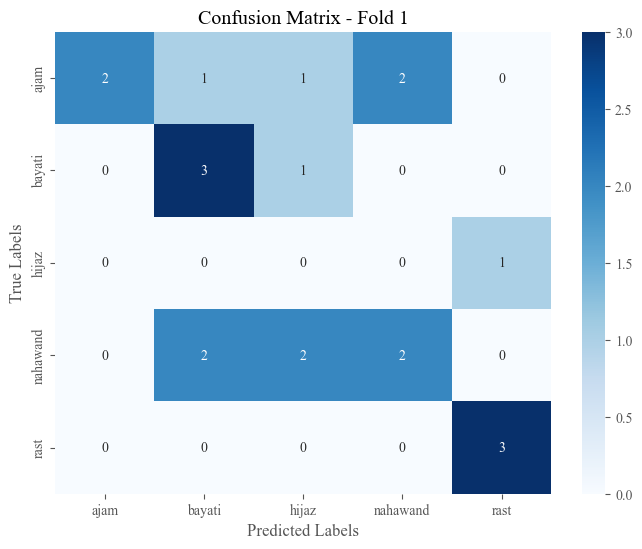

Classification Report:
               precision    recall  f1-score   support

        ajam       1.00      0.33      0.50         6
      bayati       0.50      0.75      0.60         4
       hijaz       0.00      0.00      0.00         1
    nahawand       0.50      0.33      0.40         6
        rast       0.75      1.00      0.86         3

    accuracy                           0.50        20
   macro avg       0.55      0.48      0.47        20
weighted avg       0.66      0.50      0.52        20


Results for Fold 2:


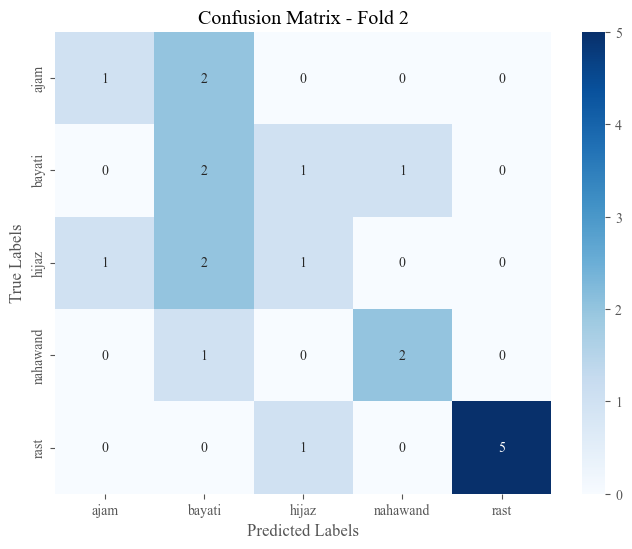

Classification Report:
               precision    recall  f1-score   support

        ajam       0.50      0.33      0.40         3
      bayati       0.29      0.50      0.36         4
       hijaz       0.33      0.25      0.29         4
    nahawand       0.67      0.67      0.67         3
        rast       1.00      0.83      0.91         6

    accuracy                           0.55        20
   macro avg       0.56      0.52      0.53        20
weighted avg       0.60      0.55      0.56        20


Results for Fold 3:


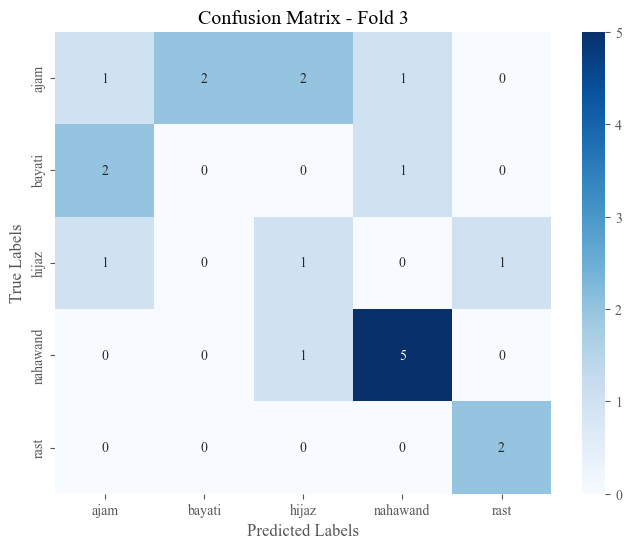

Classification Report:
               precision    recall  f1-score   support

        ajam       0.25      0.17      0.20         6
      bayati       0.00      0.00      0.00         3
       hijaz       0.25      0.33      0.29         3
    nahawand       0.71      0.83      0.77         6
        rast       0.67      1.00      0.80         2

    accuracy                           0.45        20
   macro avg       0.38      0.47      0.41        20
weighted avg       0.39      0.45      0.41        20


Results for Fold 4:


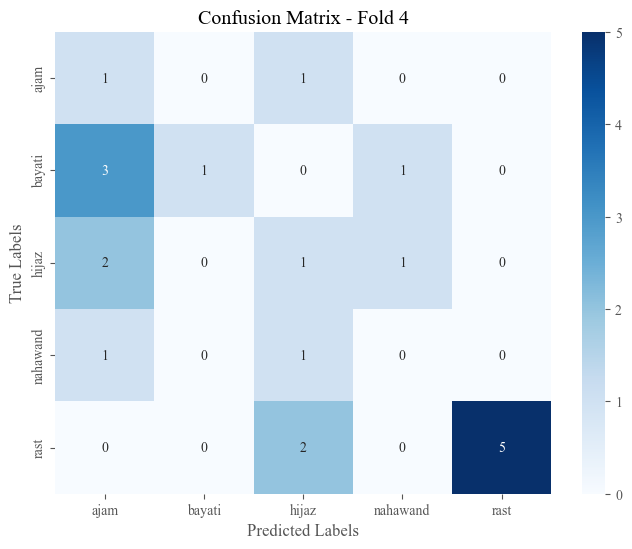

Classification Report:
               precision    recall  f1-score   support

        ajam       0.14      0.50      0.22         2
      bayati       1.00      0.20      0.33         5
       hijaz       0.20      0.25      0.22         4
    nahawand       0.00      0.00      0.00         2
        rast       1.00      0.71      0.83         7

    accuracy                           0.40        20
   macro avg       0.47      0.33      0.32        20
weighted avg       0.65      0.40      0.44        20


Results for Fold 5:


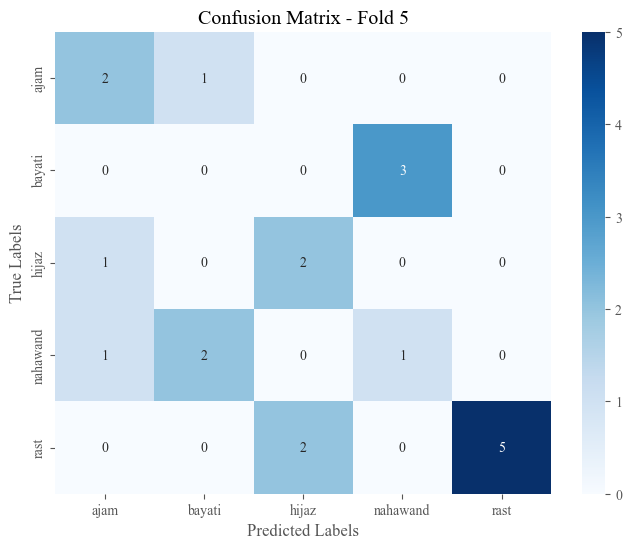

Classification Report:
               precision    recall  f1-score   support

        ajam       0.50      0.67      0.57         3
      bayati       0.00      0.00      0.00         3
       hijaz       0.50      0.67      0.57         3
    nahawand       0.25      0.25      0.25         4
        rast       1.00      0.71      0.83         7

    accuracy                           0.50        20
   macro avg       0.45      0.46      0.45        20
weighted avg       0.55      0.50      0.51        20


Results for Fold 6:


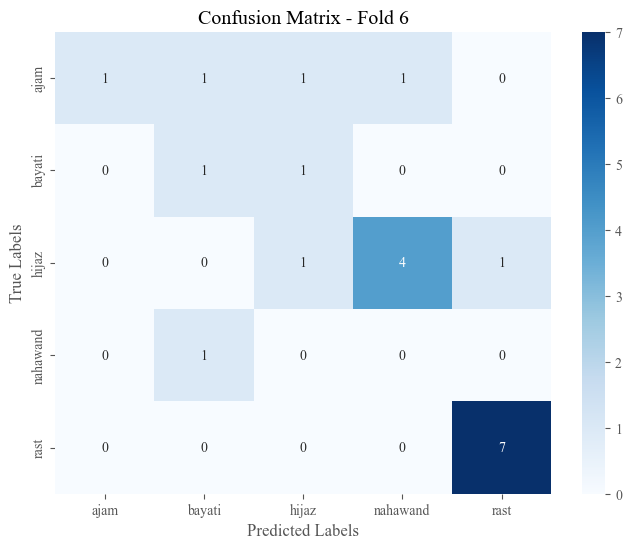

Classification Report:
               precision    recall  f1-score   support

        ajam       1.00      0.25      0.40         4
      bayati       0.33      0.50      0.40         2
       hijaz       0.33      0.17      0.22         6
    nahawand       0.00      0.00      0.00         1
        rast       0.88      1.00      0.93         7

    accuracy                           0.50        20
   macro avg       0.51      0.38      0.39        20
weighted avg       0.64      0.50      0.51        20


Results for Fold 7:


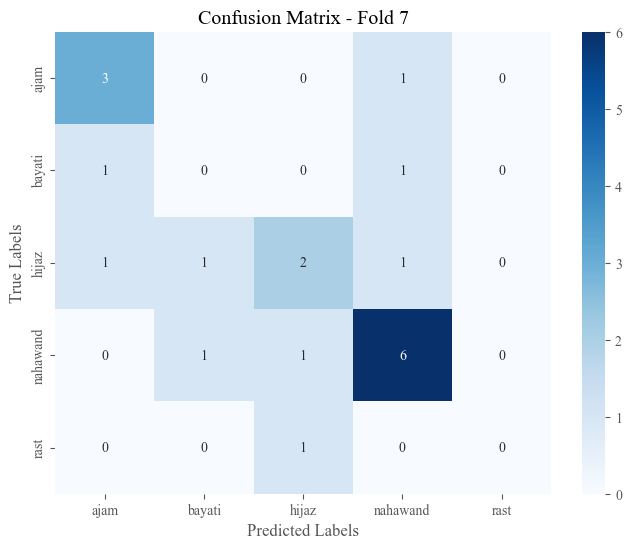

Classification Report:
               precision    recall  f1-score   support

        ajam       0.60      0.75      0.67         4
      bayati       0.00      0.00      0.00         2
       hijaz       0.50      0.40      0.44         5
    nahawand       0.67      0.75      0.71         8
        rast       0.00      0.00      0.00         1

    accuracy                           0.55        20
   macro avg       0.35      0.38      0.36        20
weighted avg       0.51      0.55      0.53        20


Results for Fold 8:


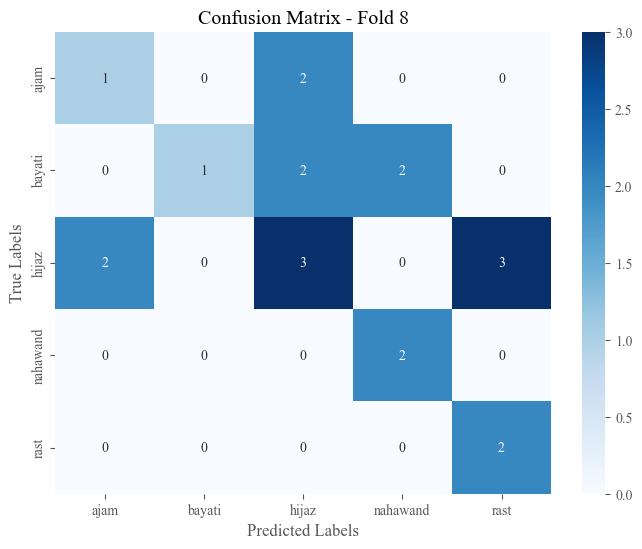

Classification Report:
               precision    recall  f1-score   support

        ajam       0.33      0.33      0.33         3
      bayati       1.00      0.20      0.33         5
       hijaz       0.43      0.38      0.40         8
    nahawand       0.50      1.00      0.67         2
        rast       0.40      1.00      0.57         2

    accuracy                           0.45        20
   macro avg       0.53      0.58      0.46        20
weighted avg       0.56      0.45      0.42        20


Results for Fold 9:


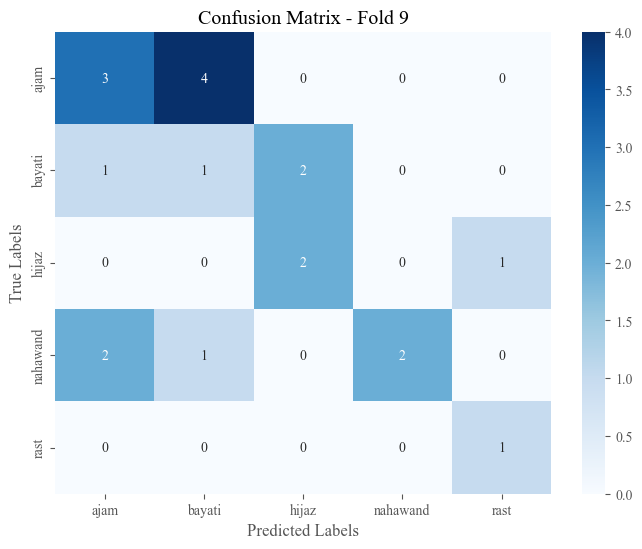

Classification Report:
               precision    recall  f1-score   support

        ajam       0.50      0.43      0.46         7
      bayati       0.17      0.25      0.20         4
       hijaz       0.50      0.67      0.57         3
    nahawand       1.00      0.40      0.57         5
        rast       0.50      1.00      0.67         1

    accuracy                           0.45        20
   macro avg       0.53      0.55      0.49        20
weighted avg       0.56      0.45      0.46        20


Results for Fold 10:


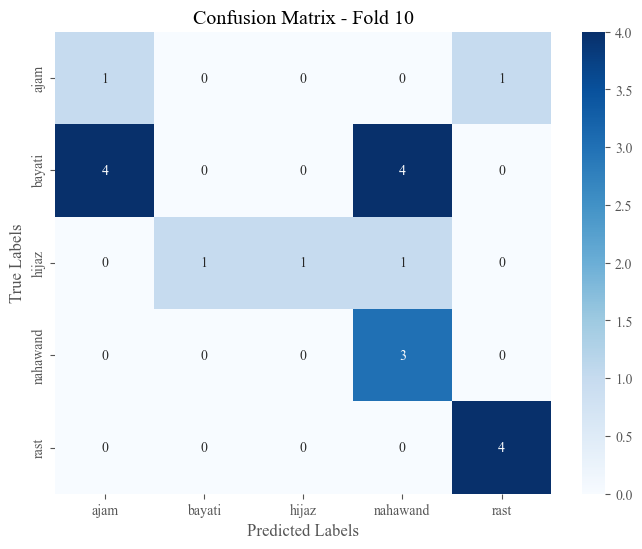

Classification Report:
               precision    recall  f1-score   support

        ajam       0.20      0.50      0.29         2
      bayati       0.00      0.00      0.00         8
       hijaz       1.00      0.33      0.50         3
    nahawand       0.38      1.00      0.55         3
        rast       0.80      1.00      0.89         4

    accuracy                           0.45        20
   macro avg       0.47      0.57      0.44        20
weighted avg       0.39      0.45      0.36        20



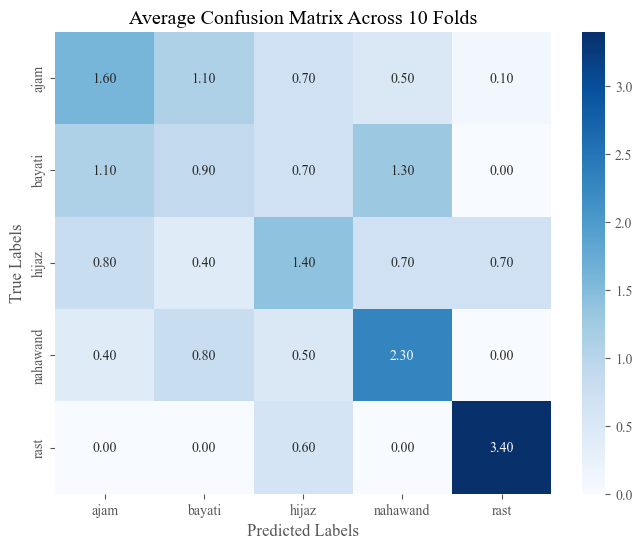

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Map class indices to specific labels
class_labels = ["ajam", "bayati", "hijaz", "nahawand", "rast"]

# Initialize variables to accumulate confusion matrices
average_cm = np.zeros((5, 5))  # Assuming 5 classes, adjust if necessary

# Loop through all folds
for i, fold_predictions in enumerate(all_predictions):
    print(f"\nResults for Fold {i + 1}:")

    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Accumulate confusion matrices
    average_cm += cm

    # Plot confusion matrix heatmap with labeled axes
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - Fold {i + 1}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    print("Classification Report:\n", classification_reports[i])

# Calculate the average confusion matrix
average_cm /= len(all_predictions)

# Plot average confusion matrix heatmap with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Average Confusion Matrix Across 10 Folds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Results for Fold 1:


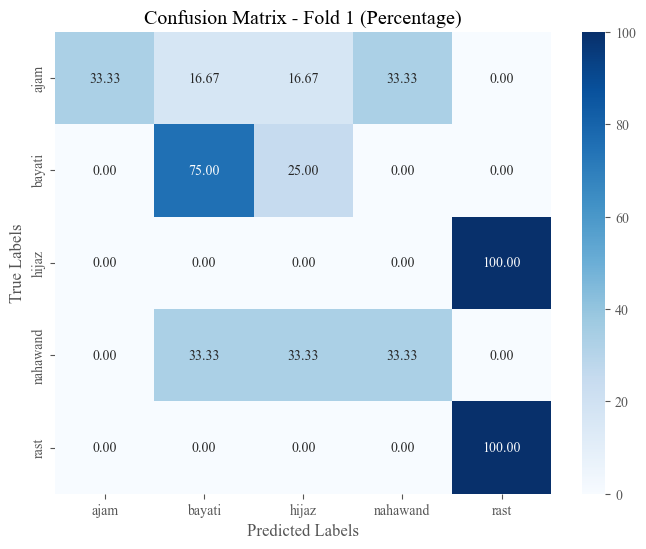

Classification Report:
               precision    recall  f1-score   support

        ajam       1.00      0.33      0.50         6
      bayati       0.50      0.75      0.60         4
       hijaz       0.00      0.00      0.00         1
    nahawand       0.50      0.33      0.40         6
        rast       0.75      1.00      0.86         3

    accuracy                           0.50        20
   macro avg       0.55      0.48      0.47        20
weighted avg       0.66      0.50      0.52        20


Results for Fold 2:


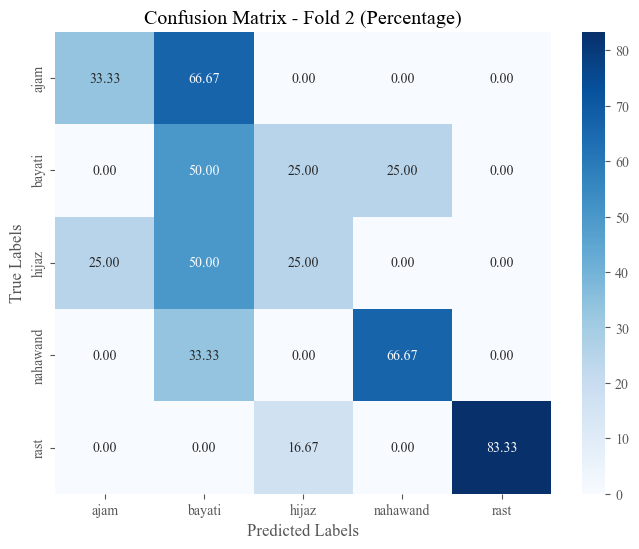

Classification Report:
               precision    recall  f1-score   support

        ajam       0.50      0.33      0.40         3
      bayati       0.29      0.50      0.36         4
       hijaz       0.33      0.25      0.29         4
    nahawand       0.67      0.67      0.67         3
        rast       1.00      0.83      0.91         6

    accuracy                           0.55        20
   macro avg       0.56      0.52      0.53        20
weighted avg       0.60      0.55      0.56        20


Results for Fold 3:


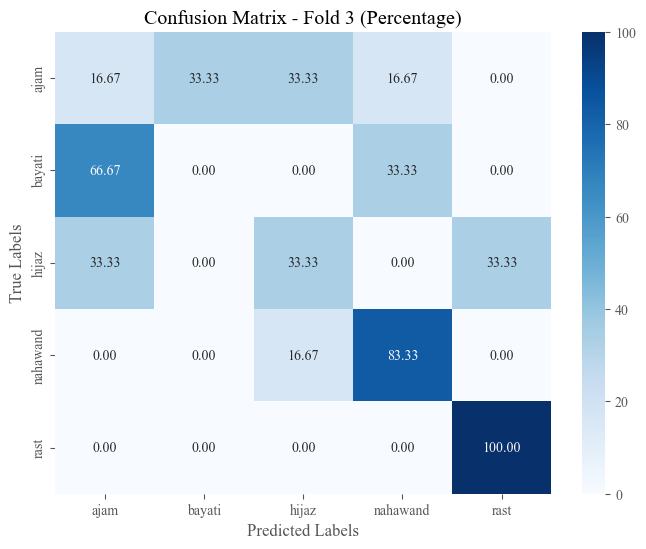

Classification Report:
               precision    recall  f1-score   support

        ajam       0.25      0.17      0.20         6
      bayati       0.00      0.00      0.00         3
       hijaz       0.25      0.33      0.29         3
    nahawand       0.71      0.83      0.77         6
        rast       0.67      1.00      0.80         2

    accuracy                           0.45        20
   macro avg       0.38      0.47      0.41        20
weighted avg       0.39      0.45      0.41        20


Results for Fold 4:


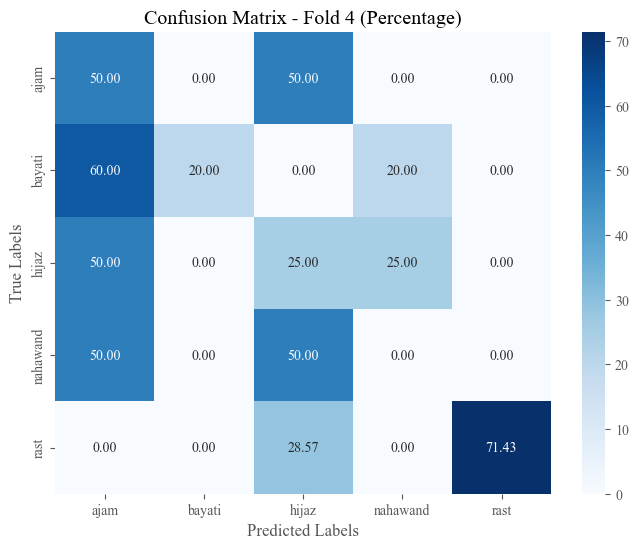

Classification Report:
               precision    recall  f1-score   support

        ajam       0.14      0.50      0.22         2
      bayati       1.00      0.20      0.33         5
       hijaz       0.20      0.25      0.22         4
    nahawand       0.00      0.00      0.00         2
        rast       1.00      0.71      0.83         7

    accuracy                           0.40        20
   macro avg       0.47      0.33      0.32        20
weighted avg       0.65      0.40      0.44        20


Results for Fold 5:


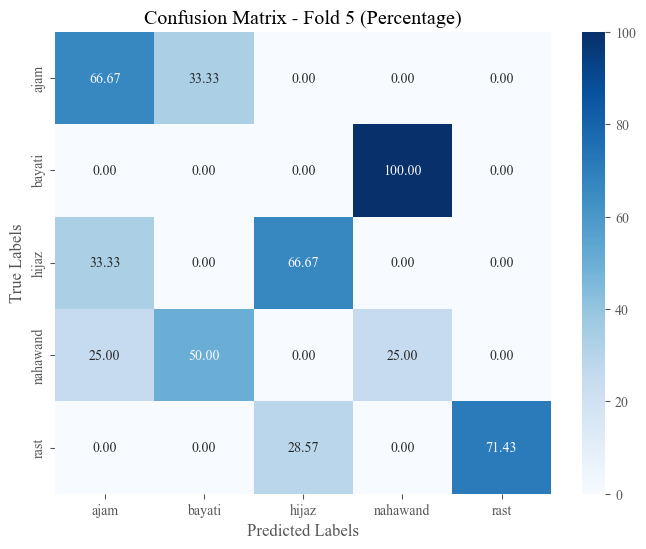

Classification Report:
               precision    recall  f1-score   support

        ajam       0.50      0.67      0.57         3
      bayati       0.00      0.00      0.00         3
       hijaz       0.50      0.67      0.57         3
    nahawand       0.25      0.25      0.25         4
        rast       1.00      0.71      0.83         7

    accuracy                           0.50        20
   macro avg       0.45      0.46      0.45        20
weighted avg       0.55      0.50      0.51        20


Results for Fold 6:


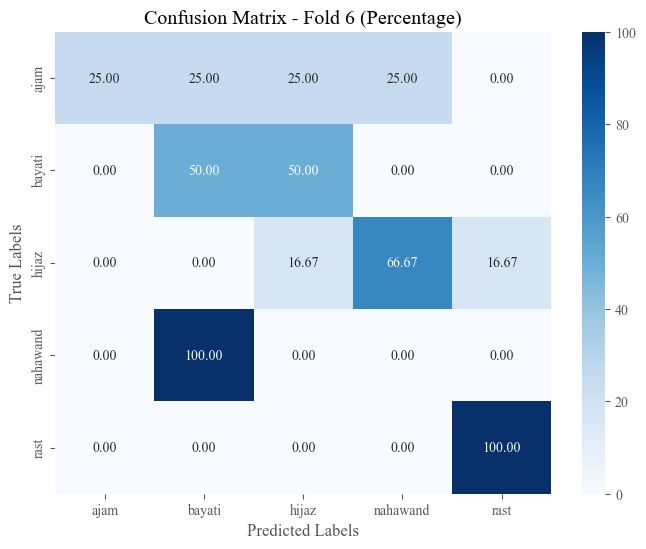

Classification Report:
               precision    recall  f1-score   support

        ajam       1.00      0.25      0.40         4
      bayati       0.33      0.50      0.40         2
       hijaz       0.33      0.17      0.22         6
    nahawand       0.00      0.00      0.00         1
        rast       0.88      1.00      0.93         7

    accuracy                           0.50        20
   macro avg       0.51      0.38      0.39        20
weighted avg       0.64      0.50      0.51        20


Results for Fold 7:


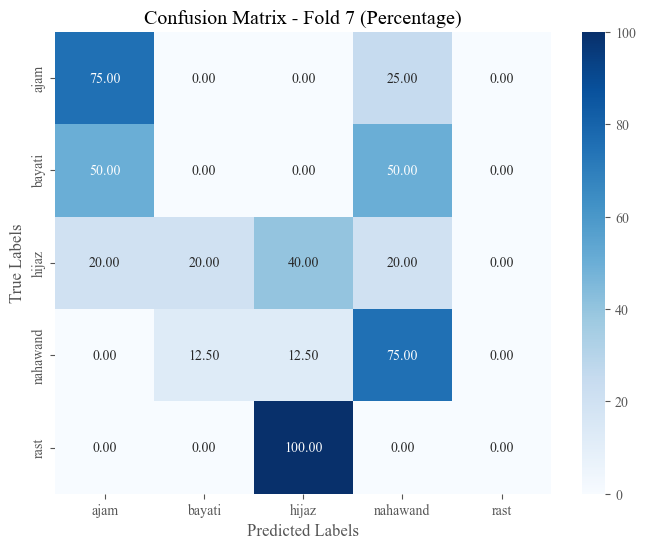

Classification Report:
               precision    recall  f1-score   support

        ajam       0.60      0.75      0.67         4
      bayati       0.00      0.00      0.00         2
       hijaz       0.50      0.40      0.44         5
    nahawand       0.67      0.75      0.71         8
        rast       0.00      0.00      0.00         1

    accuracy                           0.55        20
   macro avg       0.35      0.38      0.36        20
weighted avg       0.51      0.55      0.53        20


Results for Fold 8:


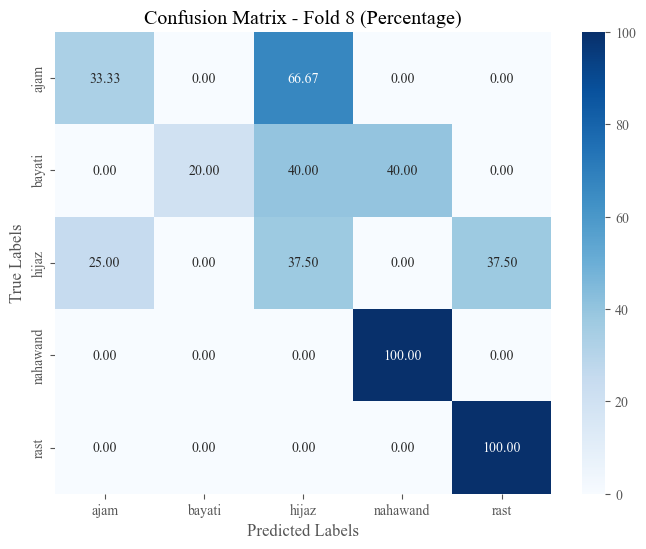

Classification Report:
               precision    recall  f1-score   support

        ajam       0.33      0.33      0.33         3
      bayati       1.00      0.20      0.33         5
       hijaz       0.43      0.38      0.40         8
    nahawand       0.50      1.00      0.67         2
        rast       0.40      1.00      0.57         2

    accuracy                           0.45        20
   macro avg       0.53      0.58      0.46        20
weighted avg       0.56      0.45      0.42        20


Results for Fold 9:


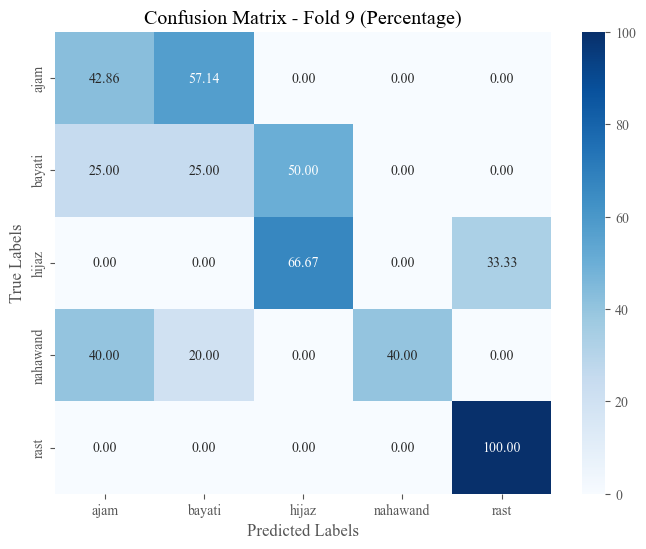

Classification Report:
               precision    recall  f1-score   support

        ajam       0.50      0.43      0.46         7
      bayati       0.17      0.25      0.20         4
       hijaz       0.50      0.67      0.57         3
    nahawand       1.00      0.40      0.57         5
        rast       0.50      1.00      0.67         1

    accuracy                           0.45        20
   macro avg       0.53      0.55      0.49        20
weighted avg       0.56      0.45      0.46        20


Results for Fold 10:


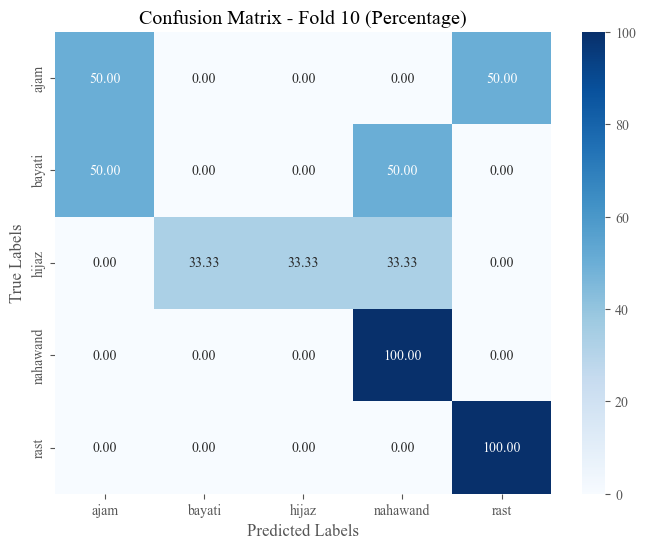

Classification Report:
               precision    recall  f1-score   support

        ajam       0.20      0.50      0.29         2
      bayati       0.00      0.00      0.00         8
       hijaz       1.00      0.33      0.50         3
    nahawand       0.38      1.00      0.55         3
        rast       0.80      1.00      0.89         4

    accuracy                           0.45        20
   macro avg       0.47      0.57      0.44        20
weighted avg       0.39      0.45      0.36        20



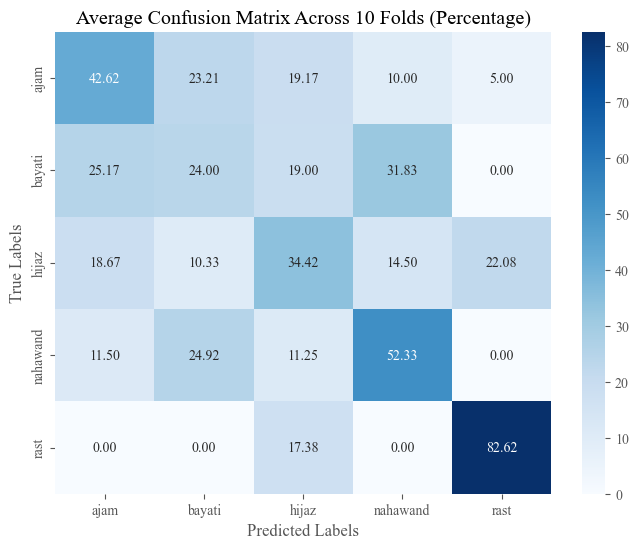


Average Classification Report Across 10 Folds:
          precision  recall  f1-score  support
ajam           0.50    0.43      0.40      4.0
bayati         0.33    0.24      0.22      4.0
hijaz          0.40    0.34      0.35      4.0
nahawand       0.47    0.52      0.46      4.0
rast           0.70    0.83      0.73      4.0


In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set font family to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Map class indices to specific labels
class_labels = ["ajam", "bayati", "hijaz", "nahawand", "rast"]

# Initialize variables to accumulate confusion matrices and classification reports
average_cm = np.zeros((5, 5))  # Assuming 5 classes, adjust if necessary
average_classification_report = {
    'precision': np.zeros(5),
    'recall': np.zeros(5),
    'f1-score': np.zeros(5),
    'support': np.zeros(5)
}

# Loop through all folds
for i, fold_predictions in enumerate(all_predictions):
    print(f"\nResults for Fold {i + 1}:")

    true_labels = fold_predictions['true_labels']
    predicted_labels = fold_predictions['predicted_labels']

    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Normalize confusion matrix to percentages
    cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100

    # Accumulate confusion matrices
    average_cm += cm_percentage

    # Display confusion matrix heatmap with labeled axes
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - Fold {i + 1} (Percentage)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Display classification report
    current_classification_report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print("Classification Report:\n", current_classification_report)

    # Accumulate classification reports
    average_classification_report_fold = classification_report(true_labels, predicted_labels, target_names=class_labels, output_dict=True)
    for label in class_labels:
        average_classification_report['precision'][class_labels.index(label)] += average_classification_report_fold[label]['precision']
        average_classification_report['recall'][class_labels.index(label)] += average_classification_report_fold[label]['recall']
        average_classification_report['f1-score'][class_labels.index(label)] += average_classification_report_fold[label]['f1-score']
        average_classification_report['support'][class_labels.index(label)] += average_classification_report_fold[label]['support']

# Calculate the average confusion matrix
average_cm /= len(all_predictions)

# Plot average confusion matrix heatmap with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Average Confusion Matrix Across 10 Folds (Percentage)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Calculate the average values for precision, recall, and F1-score
for metric in ['precision', 'recall', 'f1-score', 'support']:
    average_classification_report[metric] /= len(all_predictions)

# Round the values in the average classification report to two decimal places
for metric in ['precision', 'recall', 'f1-score']:
    average_classification_report[metric] = np.round(average_classification_report[metric], 2)

# Display average classification report
print("\nAverage Classification Report Across 10 Folds:")
average_classification_report_df = pd.DataFrame(average_classification_report, index=class_labels)
print(average_classification_report_df)

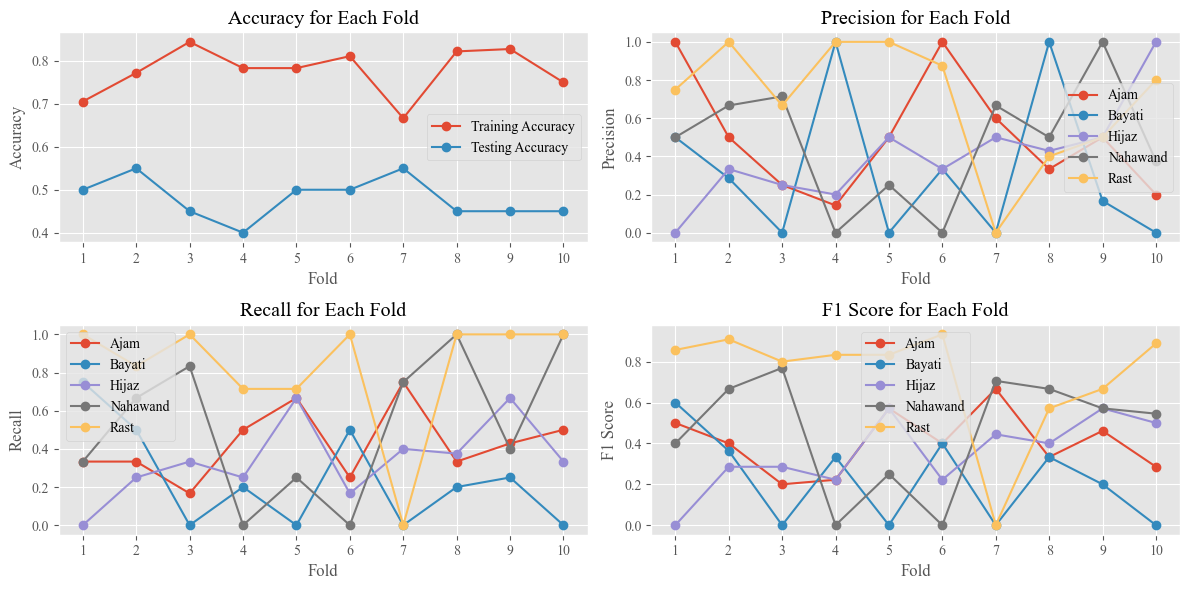

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Set font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Define class labels
class_labels = ['Ajam', 'Bayati', 'Hijaz', 'Nahawand', 'Rast']

# Create arrays for plotting
fold_numbers = np.arange(1, fold)  # Adjust the range to match the actual number of folds
training_accuracies = np.array(train_accuracies)
testing_accuracies = np.array(testing_accuracies)
precision_scores = np.array(precicion_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(fold_numbers, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(fold_numbers, testing_accuracies, label='Testing Accuracy', marker='o')
plt.title('Accuracy for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting Precision
plt.subplot(2, 2, 2)
for class_num in range(precision_scores.shape[1]):
    plt.plot(fold_numbers, precision_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('Precision for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting Recall
plt.subplot(2, 2, 3)
for class_num in range(recall_scores.shape[1]):
    plt.plot(fold_numbers, recall_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('Recall for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

# Plotting F1 Score
plt.subplot(2, 2, 4)
for class_num in range(f1_scores.shape[1]):
    plt.plot(fold_numbers, f1_scores[:, class_num], label=f'{class_labels[class_num]}', marker='o')
plt.title('F1 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.xticks(fold_numbers)  # Set xticks to match the number of folds
plt.legend()

plt.tight_layout()
plt.show()


Runtime pelatihan fold 1: 63.16 detik
Runtime pelatihan fold 2: 62.93 detik
Runtime pelatihan fold 3: 43.77 detik
Runtime pelatihan fold 4: 46.25 detik
Runtime pelatihan fold 5: 46.60 detik
Runtime pelatihan fold 6: 42.00 detik
Runtime pelatihan fold 7: 77.58 detik
Runtime pelatihan fold 8: 65.69 detik
Runtime pelatihan fold 9: 66.89 detik
Runtime pelatihan fold 10: 60.76 detik
----------------------------------------
Total waktu eksekusi untuk semua fold: 575.62 detik
Rata-rata waktu eksekusi: 57.56 detik


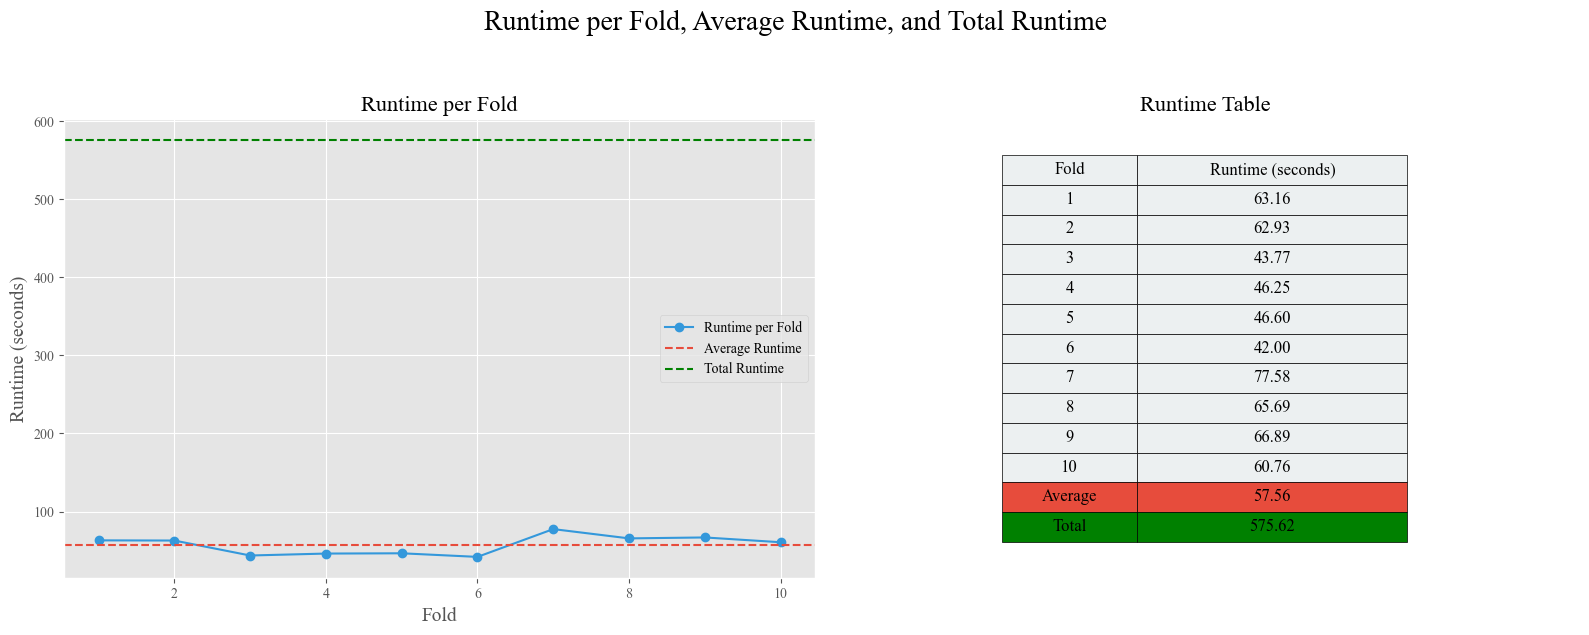

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set font family to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Cetak waktu eksekusi training untuk setiap fold
for i, time in enumerate(training_times):
    print(f"Runtime pelatihan fold {i + 1}: {time:.2f} detik")

# Menghitung rata-rata training loss dan akurasi dari masing-masing fold
average_time = np.mean(training_times)

# **Tambahkan total waktu eksekusi**
total_time = np.sum(training_times)

print("----------------------------------------")
print(f"Total waktu eksekusi untuk semua fold: {total_time:.2f} detik")
print(f"Rata-rata waktu eksekusi: {average_time:.2f} detik")

# Choose a color for highlighting and pastel blue for runtime per fold
highlight_color = '#e74c3c'  # Red for average runtime
pastel_blue_color = '#3498db'  # Pastel blue for runtime per fold

# Create a table with runtime information
table_data = [['Fold', 'Runtime (seconds)']]
for i, time in enumerate(training_times):
    table_data.append([f'{i + 1}', f'{time:.2f}'])

# Add the average and total runtime to the table and highlight the corresponding rows
table_data.append(['Average', f'{average_time:.2f}'])
table_data.append(['Total', f'{total_time:.2f}'])
average_row_index = len(table_data) - 2
total_row_index = len(table_data) - 1

# Plot runtime per fold as a line plot
plt.figure(figsize=(16, 6))

# Subplot 1: Line Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_times) + 1), training_times, marker='o', color=pastel_blue_color, label='Runtime per Fold')
plt.axhline(y=average_time, color=highlight_color, linestyle='--', label='Average Runtime')
plt.axhline(y=total_time, color='green', linestyle='--', label='Total Runtime')  # **Tambahkan garis total waktu**
plt.title('Runtime per Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.legend()

# Subplot 2: Table
plt.subplot(1, 2, 2)
table = plt.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.1, 0.2],
                  cellColours=[['#ecf0f1']*2] * average_row_index + [[highlight_color]*2] +
                               [['#ecf0f1']*2] * (total_row_index - average_row_index - 1) +
                               [['green']*2] +
                               [['#ecf0f1']*2] * (len(training_times) - total_row_index - 1))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.8, 1.8)  # Adjust the scale to fit the content
plt.axis('off')  # Turn off the axis
plt.title('Runtime Table', fontsize=16)

plt.suptitle('Runtime per Fold, Average Runtime, and Total Runtime', fontsize=20, y=1.05)  # Adjust title position
plt.tight_layout()

plt.show()


In [15]:
# Menampilkan hasil training loss dan akurasi dari masing-masing fold
for i in range(len(losses)):
    print(f"Fold {i+1}: Loss = {losses[i]}, Accuracy = {train_accuracies[i]}")
    
# Menghitung rata-rata training loss dan akurasi dari masing-masing fold
average_loss = np.mean(losses)
average_accuracy = np.mean(train_accuracies)

print("----------------------------------------")
print(f"Rata-rata Loss: {average_loss}")
print(f"Rata-rata Akurasi: {average_accuracy}")

Fold 1: Loss = 0.6903912425041199, Accuracy = 0.7055555582046509
Fold 2: Loss = 0.5604787468910217, Accuracy = 0.7722222208976746
Fold 3: Loss = 0.42213401198387146, Accuracy = 0.8444444537162781
Fold 4: Loss = 0.6205649375915527, Accuracy = 0.7833333611488342
Fold 5: Loss = 0.5333480834960938, Accuracy = 0.7833333611488342
Fold 6: Loss = 0.5103737115859985, Accuracy = 0.8111110925674438
Fold 7: Loss = 0.769383430480957, Accuracy = 0.6666666865348816
Fold 8: Loss = 0.5040225386619568, Accuracy = 0.8222222328186035
Fold 9: Loss = 0.5007489323616028, Accuracy = 0.8277778029441833
Fold 10: Loss = 0.6360565423965454, Accuracy = 0.75
----------------------------------------
Rata-rata Loss: 0.574750217795372
Rata-rata Akurasi: 0.7766666769981384


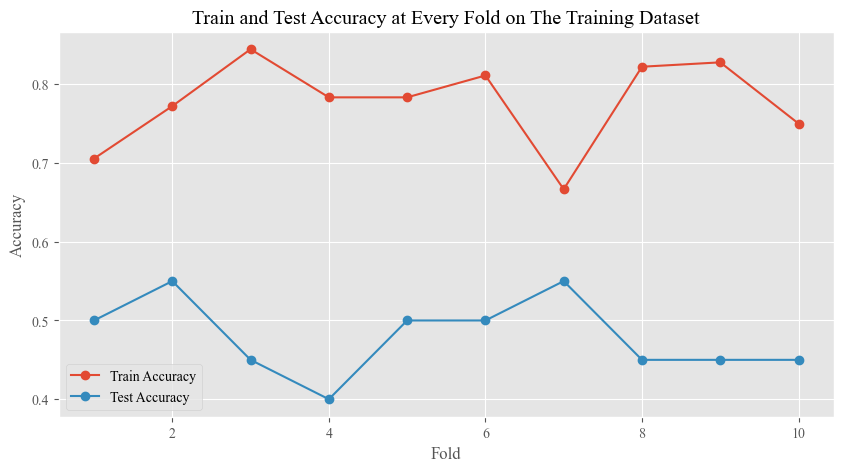

In [16]:
# Membuat plot akurasi
plt.figure(figsize=(10, 5))
plt.plot(range(1, fold ), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, fold ), testing_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy at Every Fold on The Training Dataset')
plt.legend()
plt.show()

Rata-rata Akurasi Training: 0.7767
Rata-rata Akurasi Testing: 0.4800


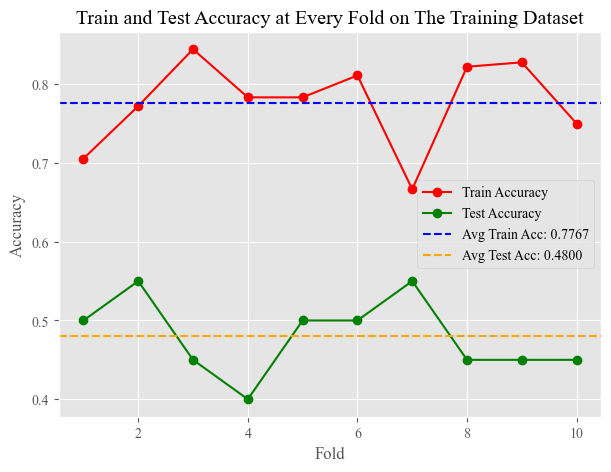

In [63]:
# Menampilkan rata-rata akurasi dari seluruh fold yang dilakukan pada training dan testing
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(testing_accuracies)

print(f"Rata-rata Akurasi Training: {avg_train_accuracy:.4f}")
print(f"Rata-rata Akurasi Testing: {avg_test_accuracy:.4f}")

# Membuat plot akurasi
plt.figure(figsize=(7, 5))
plt.plot(range(1, fold), train_accuracies, marker='o', color='red', label='Train Accuracy')
plt.plot(range(1, fold), testing_accuracies, marker='o', color='green', label='Test Accuracy')
plt.axhline(y=avg_train_accuracy, color='blue', linestyle='--', label=f'Avg Train Acc: {avg_train_accuracy:.4f}')
plt.axhline(y=avg_test_accuracy, color='orange', linestyle='--', label=f'Avg Test Acc: {avg_test_accuracy:.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy at Every Fold on The Training Dataset')
plt.legend()
plt.show()

In [17]:
# Convert list testing_accuracies ke dalam numpy array
testing_accuracies_np = np.array(testing_accuracies)

# Hitung standar deviasi
std_deviation = np.std(testing_accuracies_np)

# Tampilkan hasil standar deviasi
print(f"Standar Deviasi Testing Accuracies: {std_deviation}")

Standar Deviasi Testing Accuracies: 0.045825756949558406



All Fold Accuracies:
Fold 1 Accuracy: 0.5
Fold 2 Accuracy: 0.55
Fold 3 Accuracy: 0.45
Fold 4 Accuracy: 0.4
Fold 5 Accuracy: 0.5
Fold 6 Accuracy: 0.5
Fold 7 Accuracy: 0.55
Fold 8 Accuracy: 0.45
Fold 9 Accuracy: 0.45
Fold 10 Accuracy: 0.45

Average Metrics Across Folds:
      Class  Precision  Recall  F1 Score
0      ajam       0.50    0.43      0.40
1    bayati       0.33    0.24      0.22
2     hijaz       0.40    0.34      0.35
3  nahawand       0.47    0.52      0.46
4      rast       0.70    0.83      0.73

Average Testing Accuracy Across All Folds: 0.48


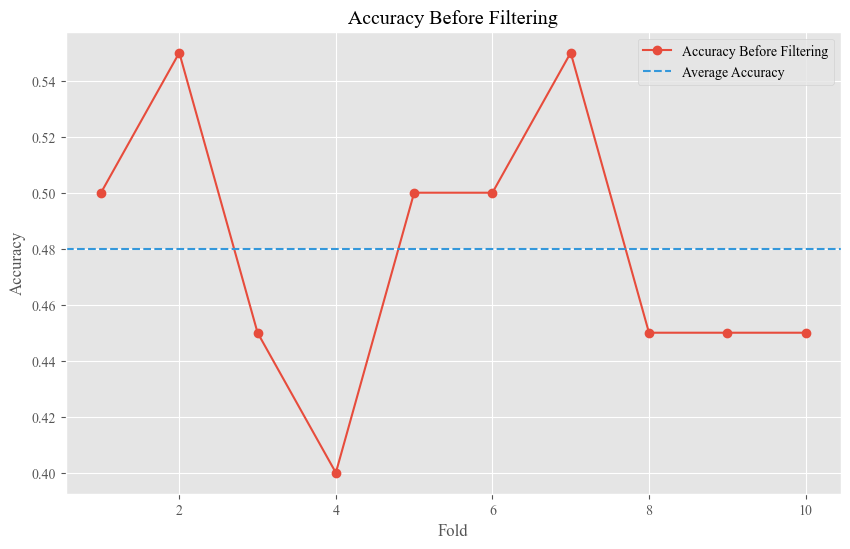

--------------------------------------------------------------------------------------------------------------------
Average Testing Accuracy: 0.4800000000000001
Standard Deviation: 0.045825756949558406
Filtered Testing Accuracies within One Standard Deviation:
Fold 1 - Accuracy: 0.5
Fold 3 - Accuracy: 0.45
Fold 5 - Accuracy: 0.5
Fold 6 - Accuracy: 0.5
Fold 8 - Accuracy: 0.45
Fold 9 - Accuracy: 0.45
Fold 10 - Accuracy: 0.45

Metrics for Filtered Testing Accuracies:
      Class  Precision  Recall  F1 Score
0      ajam       0.50    0.43      0.40
1    bayati       0.33    0.24      0.22
2     hijaz       0.40    0.34      0.35
3  nahawand       0.47    0.52      0.46
4      rast       0.70    0.83      0.73

Average Testing Accuracy (Filtered): 0.47


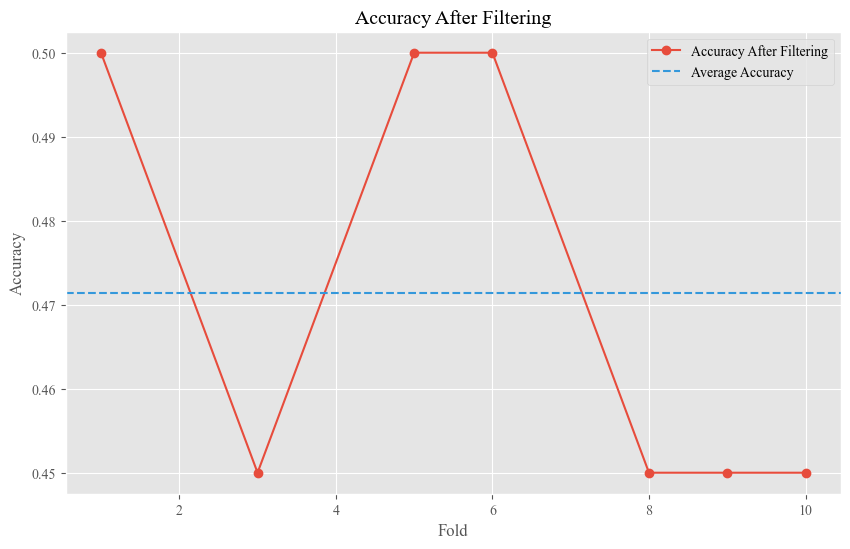

In [18]:
# Choose a color for highlighting and pastel blue for runtime per fold
highlight_color = '#e74c3c'  # Red for average runtime
pastel_blue_color = '#3498db'  # Pastel blue for runtime per fold

# Calculate the average metrics across all folds
avg_precision = np.mean(precision_scores, axis=0)
avg_recall = np.mean(recall_scores, axis=0)
avg_f1 = np.mean(f1_scores, axis=0)
avg_accuracy = np.mean(testing_accuracies)

# Create a DataFrame for average metrics
average_metrics = pd.DataFrame({
    'Class': ['ajam', 'bayati', 'hijaz', 'nahawand', 'rast'],
    'Precision': avg_precision,
    'Recall': avg_recall,
    'F1 Score': avg_f1
})

# Round average_metrics to two decimal places
average_metrics = average_metrics.round({'Precision': 2, 'Recall': 2, 'F1 Score': 2})

# Display the individual fold accuracies and average metrics
print("\nAll Fold Accuracies:")
for i, accuracy in enumerate(testing_accuracies, start=1):
    print(f"Fold {i} Accuracy: {accuracy}")

print("\nAverage Metrics Across Folds:")
print(average_metrics)

print(f"\nAverage Testing Accuracy Across All Folds: {avg_accuracy:.2f}")

# Plotting accuracy before filtering
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(testing_accuracies_np) + 1), testing_accuracies_np, marker='o', linestyle='-',color=highlight_color, label='Accuracy Before Filtering')
plt.axhline(y=avg_accuracy, color=pastel_blue_color, linestyle='--', label='Average Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Before Filtering')
plt.legend()
plt.show()

print("--------------------------------------------------------------------------------------------------------------------")

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(testing_accuracies_np)
std_deviation = np.std(testing_accuracies_np)

# Filter testing accuracies based on standard deviation
testing_acc_after_std = []

for i, accuracy in enumerate(testing_accuracies_np):
    if average_accuracy - std_deviation <= accuracy <= average_accuracy + std_deviation:
        testing_acc_after_std.append((i + 1, accuracy))  # Include fold information

# Display results
print(f"Average Testing Accuracy: {average_accuracy}")
print(f"Standard Deviation: {std_deviation}")
print(f"Filtered Testing Accuracies within One Standard Deviation:")

for fold_num, acc in testing_acc_after_std:
    print(f"Fold {fold_num} - Accuracy: {acc}")

# Calculate and display precision, recall, and F1 score for filtered accuracies
filtered_predictions = [all_predictions[i - 1] for i, _ in testing_acc_after_std]

# Aggregate predictions from filtered folds
all_true_labels = np.concatenate([pred['true_labels'] for pred in filtered_predictions])
all_predicted_labels = np.concatenate([pred['predicted_labels'] for pred in filtered_predictions])

# Calculate metrics
filtered_precision = precision_score(all_true_labels, all_predicted_labels, average=None)
filtered_recall = recall_score(all_true_labels, all_predicted_labels, average=None)
filtered_f1 = f1_score(all_true_labels, all_predicted_labels, average=None)

# Round df to two decimal places
average_metrics = average_metrics.round({'Precision': 2, 'Recall': 2, 'F1 Score': 2})

# Display metrics for filtered accuracies
print("\nMetrics for Filtered Testing Accuracies:")
print(average_metrics)

# Calculate average accuracy for filtered accuracies
average_filtered_accuracy = np.mean([acc for _, acc in testing_acc_after_std])

# Display average accuracy for filtered accuracies
print(f"\nAverage Testing Accuracy (Filtered): {average_filtered_accuracy:.2f}")

# Plotting accuracy after filtering
filtered_fold_numbers, filtered_accuracies = zip(*testing_acc_after_std)

plt.figure(figsize=(10, 6))
plt.plot(filtered_fold_numbers, filtered_accuracies, marker='o', linestyle='-',color=highlight_color, label='Accuracy After Filtering')
plt.axhline(y=average_filtered_accuracy, color=pastel_blue_color, linestyle='--', label='Average Accuracy')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy After Filtering')
plt.legend()
plt.show()


In [19]:
 # Prediksi model
prediction = model.predict(X_test)    
test_pred = np.argmax(prediction, axis=1)
test_pred = label_encoder.inverse_transform(test_pred)
true_y = label_encoder.inverse_transform(np.argmax(to_categorical(y_test), axis=1)[:, 1])

2/2 [==============================] - 1s 20ms/step


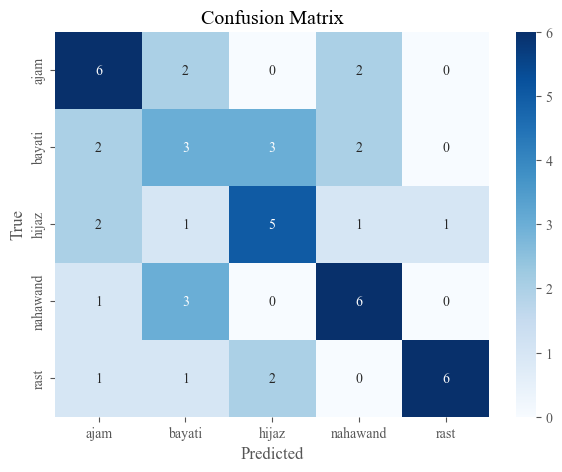


Classification Report:
              precision    recall  f1-score   support

        ajam     0.5000    0.6000    0.5455        10
      bayati     0.3000    0.3000    0.3000        10
       hijaz     0.5000    0.5000    0.5000        10
    nahawand     0.5455    0.6000    0.5714        10
        rast     0.8571    0.6000    0.7059        10

    accuracy                         0.5200        50
   macro avg     0.5405    0.5200    0.5246        50
weighted avg     0.5405    0.5200    0.5246        50



In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Hitung confusion matrix
conf_matrix = confusion_matrix(true_y, test_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(true_y, test_pred, target_names=label_encoder.classes_, digits=4))
